# **Case Interview** - Data Science

# **2° Problema - Análisis de Regresión**
_______________________________________

Bibliografía: Practical Statistcs for Data Scientists. Bruce P., Bruce A & Gedeck P. O'REILLY. 2da Edition

# 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro

# 2. Cargar archivo

In [2]:
df = pd.read_csv('reg_cancer_deathrate.csv', sep=',')

In [3]:
df.head(10)

,DeathRate,Perc_OnlyPrivate,Perc_Private,Perc_Poverty,Perc_MarriedHouse,Avg_Cases,Mean_Male,Mean_Female,BirthRate,Perc_Married,Perc_Unemployed16,Perc_HighSchool25,Perc_HighSchool18_24,Perc_Col18_24,Perc_Bach25,Perc_Emp16,Avg_DeathPerYear,Mean_Income,IncidenceRate
0,140.0,56.7,78.8,10.2,60.824742,17.000000,46.1,49.8,4.047619,66.7,1.2,35.1,38.4,NaN,18.1,64.7,6,45710,405.200000
1,191.5,49.8,64.4,16.9,46.527144,1551.000000,38.1,40.3,5.573941,48.2,11.5,33.3,34.6,38.8,14.0,57.4,658,47708,466.600000
2,203.3,60.4,69.1,9.9,42.882250,8.000000,38.8,32.9,4.391052,40.6,2.1,37.0,52.1,NaN,10.3,80.1,3,68387,201.300000
3,146.2,66.5,84.2,14.2,53.925845,1962.667684,31.4,33.9,6.221294,51.3,3.1,27.2,22.9,NaN,20.1,63.6,20,55292,453.549422
4,192.8,51.4,66.5,13.9,44.244120,187.000000,39.8,41.3,6.150456,47.6,7.0,33.2,26.9,54.7,15.4,59.9,104,46475,354.700000
5,213.7,NaN,60.0,17.6,50.628839,54.000000,49.5,50.2,4.633205,52.1,15.6,46.8,53.8,NaN,9.3,40.2,29,39539,439.100000
6,163.7,NaN,84.7,6.1,61.858367,568.000000,40.4,43.2,4.125166,58.9,4.4,27.6,30.3,46.4,23.6,65.1,185,81940,496.600000
7,231.1,NaN,49.8,31.4,41.216080,161.000000,36.7,43.3,6.399575,38.6,15.5,41.0,34.7,NaN,5.5,41.7,73,31170,494.700000
8,194.9,37.6,48.7,26.0,46.626016,169.000000,36.1,39.5,4.448743,43.7,14.3,31.5,39.0,NaN,10.2,45.4,65,35314,513.200000
9,214.2,NaN,67.0,13.1,45.230663,50.000000,47.6,49.4,4.814305,44.7,8.2,39.3,41.6,NaN,7.2,54.6,23,49768,492.600000


# 3. Revisión del Dataset

3.1 Revisión de los atributos

In [4]:
df.columns.tolist()

['DeathRate',
 'Perc_OnlyPrivate',
 'Perc_Private',
 'Perc_Poverty',
 'Perc_MarriedHouse',
 'Avg_Cases',
 'Mean_Male',
 'Mean_Female',
 'BirthRate',
 'Perc_Married',
 'Perc_Unemployed16',
 'Perc_HighSchool25',
 'Perc_HighSchool18_24',
 'Perc_Col18_24',
 'Perc_Bach25',
 'Perc_Emp16',
 'Avg_DeathPerYear',
 'Mean_Income',
 'IncidenceRate']

3.2 Número de filas y atributos

In [5]:
df.shape

(3047, 19)

3.3 Datos estadísticos

In [6]:
df.describe(include='all')

,DeathRate,Perc_OnlyPrivate,Perc_Private,Perc_Poverty,Perc_MarriedHouse,Avg_Cases,Mean_Male,Mean_Female,BirthRate,Perc_Married,Perc_Unemployed16,Perc_HighSchool25,Perc_HighSchool18_24,Perc_Col18_24,Perc_Bach25,Perc_Emp16,Avg_DeathPerYear,Mean_Income,IncidenceRate
count,3047.000000,2444.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,2895.000000,3047.000000,3047.000000,3047.000000
mean,170.963177,42.453846,64.354939,16.878175,51.243872,606.338544,31.725271,42.145323,5.640306,44.906170,7.852412,34.804660,35.002068,40.977034,13.282015,54.152642,185.965868,46720.668855,448.268586
std,99.068437,79.704247,10.647057,6.409087,6.572814,1416.356223,90.056749,5.292849,1.985816,85.144007,3.452371,7.034924,9.069722,11.115805,5.394756,8.315064,504.134286,12687.958435,54.560733
min,-999.000000,-999.000000,22.300000,3.200000,22.992490,6.000000,-999.000000,22.300000,0.000000,-999.000000,0.400000,7.500000,0.000000,7.100000,2.500000,17.600000,3.000000,-999.000000,201.300000
25%,160.850000,40.900000,57.200000,12.150000,47.763063,76.000000,36.200000,39.100000,4.521419,47.700000,5.500000,30.400000,29.200000,34.000000,9.400000,48.600000,28.000000,38638.500000,420.300000
50%,177.900000,48.600000,65.100000,15.900000,51.669941,171.000000,39.500000,42.400000,5.381478,52.400000,7.600000,35.300000,34.700000,40.400000,12.300000,54.500000,61.000000,45132.000000,453.549422
75%,195.200000,55.600000,72.100000,20.400000,55.395132,518.000000,42.500000,45.300000,6.493677,56.400000,9.700000,39.650000,40.700000,46.400000,16.100000,60.300000,149.000000,52446.000000,480.850000
max,362.800000,78.900000,92.300000,47.400000,78.075397,38150.000000,64.700000,65.700000,21.326165,72.500000,29.400000,54.800000,72.500000,79.000000,42.200000,80.100000,14010.000000,125635.000000,1206.900000


3.4 Datos únicos por atributo

In [7]:
df.nunique()

DeathRate               1054
Perc_OnlyPrivate         460
Perc_Private             498
Perc_Poverty             333
Perc_MarriedHouse       3043
Avg_Cases                929
Mean_Male                299
Mean_Female              296
BirthRate               3019
Perc_Married             361
Perc_Unemployed16        195
Perc_HighSchool25        361
Perc_HighSchool18_24     469
Perc_Col18_24            343
Perc_Bach25              281
Perc_Emp16               409
Avg_DeathPerYear         608
Mean_Income             2900
IncidenceRate           1506
dtype: int64

3.5 Datos NA por atributo

In [8]:
pd.isna(df).sum()

DeathRate                  0
Perc_OnlyPrivate         603
Perc_Private               0
Perc_Poverty               0
Perc_MarriedHouse          0
Avg_Cases                  0
Mean_Male                  0
Mean_Female                0
BirthRate                  0
Perc_Married               0
Perc_Unemployed16          0
Perc_HighSchool25          0
Perc_HighSchool18_24       0
Perc_Col18_24           2285
Perc_Bach25                0
Perc_Emp16               152
Avg_DeathPerYear           0
Mean_Income                0
IncidenceRate              0
dtype: int64

3.6 Datos negativos por atributo

In [9]:
columns_ = df.columns.tolist()
for col in columns_:
  num_negativos = sum(df[col] < 0)
  print(f'Hay {num_negativos} valores negativos en {col}')

Hay 20 valores negativos en DeathRate
Hay 14 valores negativos en Perc_OnlyPrivate
Hay 0 valores negativos en Perc_Private
Hay 0 valores negativos en Perc_Poverty
Hay 0 valores negativos en Perc_MarriedHouse
Hay 0 valores negativos en Avg_Cases
Hay 23 valores negativos en Mean_Male
Hay 0 valores negativos en Mean_Female
Hay 0 valores negativos en BirthRate
Hay 20 valores negativos en Perc_Married
Hay 0 valores negativos en Perc_Unemployed16
Hay 0 valores negativos en Perc_HighSchool25
Hay 0 valores negativos en Perc_HighSchool18_24
Hay 0 valores negativos en Perc_Col18_24
Hay 0 valores negativos en Perc_Bach25
Hay 0 valores negativos en Perc_Emp16
Hay 0 valores negativos en Avg_DeathPerYear
Hay 22 valores negativos en Mean_Income
Hay 0 valores negativos en IncidenceRate


3.7 Tipos de datos por atributo

In [10]:
df.dtypes

DeathRate               float64
Perc_OnlyPrivate        float64
Perc_Private            float64
Perc_Poverty            float64
Perc_MarriedHouse       float64
Avg_Cases               float64
Mean_Male               float64
Mean_Female             float64
BirthRate               float64
Perc_Married            float64
Perc_Unemployed16       float64
Perc_HighSchool25       float64
Perc_HighSchool18_24    float64
Perc_Col18_24           float64
Perc_Bach25             float64
Perc_Emp16              float64
Avg_DeathPerYear          int64
Mean_Income               int64
IncidenceRate           float64
dtype: object

# 4. Preprocesamiento

4.1 Eliminación de valores negativos

- Se transforman los valores negativos en datos NA

In [11]:
for col in columns_:
    df.loc[df[col] < 0, col] = None

for col in columns_:
  num_negativos = sum(df[col] < 0)
  print(f'Hay {num_negativos} valores negativos en {col}')

Hay 0 valores negativos en DeathRate
Hay 0 valores negativos en Perc_OnlyPrivate
Hay 0 valores negativos en Perc_Private
Hay 0 valores negativos en Perc_Poverty
Hay 0 valores negativos en Perc_MarriedHouse
Hay 0 valores negativos en Avg_Cases
Hay 0 valores negativos en Mean_Male
Hay 0 valores negativos en Mean_Female
Hay 0 valores negativos en BirthRate
Hay 0 valores negativos en Perc_Married
Hay 0 valores negativos en Perc_Unemployed16
Hay 0 valores negativos en Perc_HighSchool25
Hay 0 valores negativos en Perc_HighSchool18_24
Hay 0 valores negativos en Perc_Col18_24
Hay 0 valores negativos en Perc_Bach25
Hay 0 valores negativos en Perc_Emp16
Hay 0 valores negativos en Avg_DeathPerYear
Hay 0 valores negativos en Mean_Income
Hay 0 valores negativos en IncidenceRate


In [12]:
pd.isna(df).sum()

DeathRate                 20
Perc_OnlyPrivate         617
Perc_Private               0
Perc_Poverty               0
Perc_MarriedHouse          0
Avg_Cases                  0
Mean_Male                 23
Mean_Female                0
BirthRate                  0
Perc_Married              20
Perc_Unemployed16          0
Perc_HighSchool25          0
Perc_HighSchool18_24       0
Perc_Col18_24           2285
Perc_Bach25                0
Perc_Emp16               152
Avg_DeathPerYear           0
Mean_Income               22
IncidenceRate              0
dtype: int64

- Luego, se eliminan solo los datos NA de los atributos 'DeathRate', 'Mean_Male', 'Perc_Married', 'Mean_Income', ya que no significa una pérdida importante de datos (solo el 2.76 % del total de datos del dataset).

In [13]:
df_ = df.dropna(subset=['DeathRate', 'Mean_Male', 'Perc_Married', 'Mean_Income']).reset_index(drop=True)

In [14]:
pd.isna(df_).sum()

DeathRate                  0
Perc_OnlyPrivate         604
Perc_Private               0
Perc_Poverty               0
Perc_MarriedHouse          0
Avg_Cases                  0
Mean_Male                  0
Mean_Female                0
BirthRate                  0
Perc_Married               0
Perc_Unemployed16          0
Perc_HighSchool25          0
Perc_HighSchool18_24       0
Perc_Col18_24           2217
Perc_Bach25                0
Perc_Emp16               150
Avg_DeathPerYear           0
Mean_Income                0
IncidenceRate              0
dtype: int64

In [15]:
df_.shape

(2963, 19)

4.2 Análisis de Correlación

- Se usa la función corr() de Pandas y el método de correlación es el de Pearson. A continuación, se grafica la matriz de correlación de los atributos del dataset a analizar.

In [16]:
corr_matrix = df_.corr(method='pearson').round(decimals=1)
df_corr_matrix = pd.DataFrame(corr_matrix)
df_corr_matrix.head(20)

,DeathRate,Perc_OnlyPrivate,Perc_Private,Perc_Poverty,Perc_MarriedHouse,Avg_Cases,Mean_Male,Mean_Female,BirthRate,Perc_Married,Perc_Unemployed16,Perc_HighSchool25,Perc_HighSchool18_24,Perc_Col18_24,Perc_Bach25,Perc_Emp16,Avg_DeathPerYear,Mean_Income,IncidenceRate
DeathRate,1.0,-0.4,-0.4,0.4,-0.3,-0.1,-0.0,0.0,-0.1,-0.3,0.4,0.4,0.3,-0.2,-0.5,-0.4,-0.1,-0.4,0.5
Perc_OnlyPrivate,-0.4,1.0,0.9,-0.8,0.4,0.2,-0.2,-0.2,-0.0,0.3,-0.6,-0.3,-0.3,0.4,0.7,0.8,0.1,0.8,0.1
Perc_Private,-0.4,0.9,1.0,-0.8,0.4,0.1,0.1,0.0,-0.0,0.4,-0.6,-0.2,-0.3,0.4,0.6,0.7,0.1,0.7,0.1
Perc_Poverty,0.4,-0.8,-0.8,1.0,-0.6,-0.1,-0.2,-0.1,-0.0,-0.6,0.7,0.2,0.1,-0.2,-0.5,-0.7,-0.1,-0.8,0.0
Perc_MarriedHouse,-0.3,0.4,0.4,-0.6,1.0,-0.1,0.2,0.2,0.1,0.9,-0.5,0.1,0.1,-0.1,0.1,0.3,-0.2,0.4,-0.2
Avg_Cases,-0.1,0.2,0.1,-0.1,-0.1,1.0,-0.1,-0.1,-0.0,-0.1,-0.0,-0.3,-0.2,0.1,0.3,0.2,0.9,0.3,0.1
Mean_Male,-0.0,-0.2,0.1,-0.2,0.2,-0.1,1.0,0.9,-0.1,0.4,-0.1,0.3,0.2,-0.3,-0.1,-0.2,-0.1,-0.1,-0.0
Mean_Female,0.0,-0.2,0.0,-0.1,0.2,-0.1,0.9,1.0,-0.1,0.4,-0.1,0.3,0.2,-0.3,-0.2,-0.3,-0.1,-0.2,-0.0
BirthRate,-0.1,-0.0,-0.0,-0.0,0.1,-0.0,-0.1,-0.1,1.0,0.1,-0.1,0.0,0.1,-0.1,-0.1,0.1,-0.1,-0.0,-0.1
Perc_Married,-0.3,0.3,0.4,-0.6,0.9,-0.1,0.4,0.4,0.1,1.0,-0.6,0.1,0.1,-0.1,0.1,0.4,-0.2,0.4,-0.1


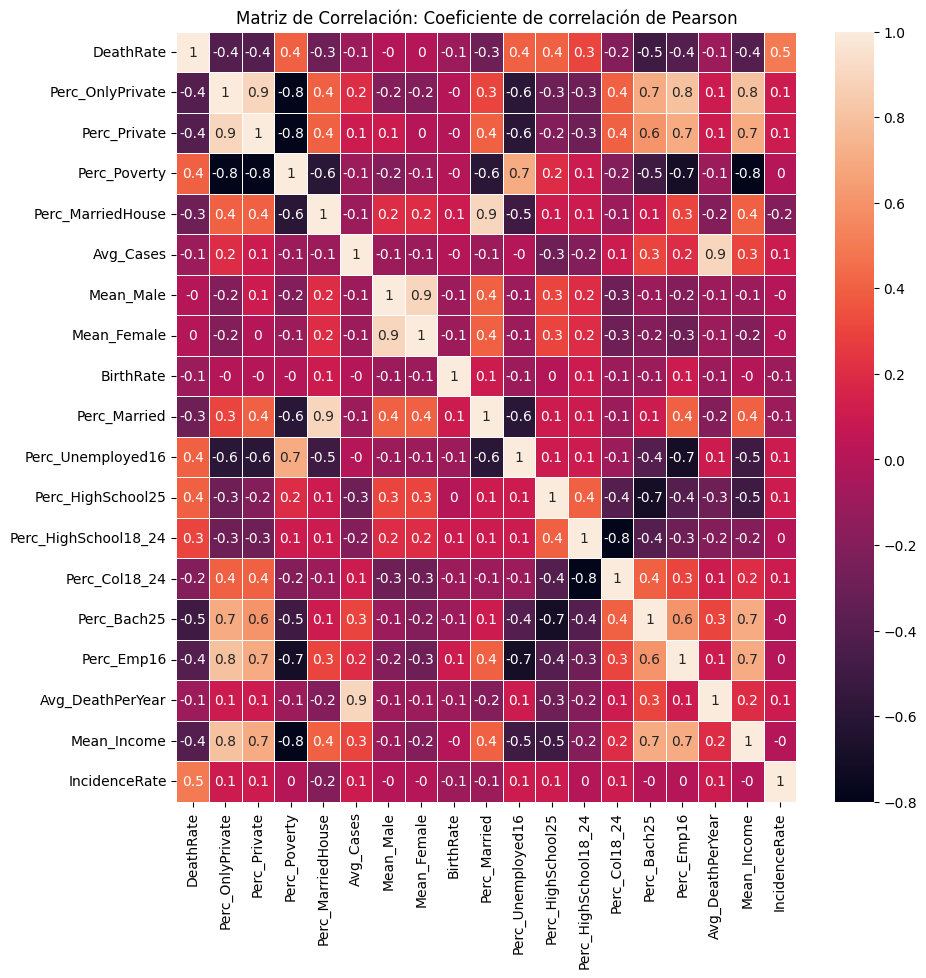

In [17]:
plt.subplots(figsize=(10,10))
plt.title('Matriz de Correlación: Coeficiente de correlación de Pearson')
ax = sns.heatmap(df_corr_matrix, annot=True, linewidth=0.5)

4.3 Separación variables independientes y variable dependiente.

Según los resultados del análisis de correlación, se proponen 3 modelos:
- **Modelo 1:** Todas aquellas variables independientes que puntuaron distinto de 0 para el coef. corr. de Pearson (**x1**).
- **Modelo 2:** Solo aquellas variables independientes que puntuaron valores negativos distintos de 0 ara el coef. corr. de Pearson (**x2**).
- **Modelo 3:** Solo aquellas variables independientes que puntuaron valores positivos distintos de 0 ara el coef. corr. de Pearson (**x3**).

**NOTA:** Los atributos 'Perc_OnlyPrivate', 'Perc_Col18_24' y 'Perc_Emp16' no son considerados en ningún modelo, puesto que a pesar de puntuar distinto de 0 para el coef. corr. de Pearson (muestra correlación en relación a 'DeathRate'), estos datos tienen una gran cantidad de NA's, lo cual podría afectar la construcción del modelo.

In [18]:
x1 = df_.iloc[:, [2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 16, 17, 18]]  # todos con corr + y -
x2 = df_.iloc[:, [2, 4, 5, 8, 9, 14, 16, 17]] # solo corr -
x3 = df_.iloc[:, [3, 10, 11, 12, 18]] # solo corr +
y = df_.iloc[:,0]

4.4 Evaluación de transformación de datos

Antes de hacer una transformación de datos para la construcción del modelo de regresión lineal, se considera evaluar la Normalidad de los datos y la Linealidad. Para ello, se realizan gráficos de distribución de la normalidad de los datos para cada variable independiente y dependiente. A continuación, se muestran los gráficos de las variables independientes en función de 'DeathRate'.

Luego, de analizar los gráficos se nota que la mayoría de los atributos se distribuyen aproximadamente normalmente y que además presentan una relación lineal con la variable dependiente, 'DeathRate'. Queda en observación los atributos 'Avg_Cases' y 'Avg_DeathPearYear', los cuales muestran una distribución de datos distinta a los demás.

Dado los resultados anteriores, se decide no hacer una transformación de los datos.

- Normalidad de los datos

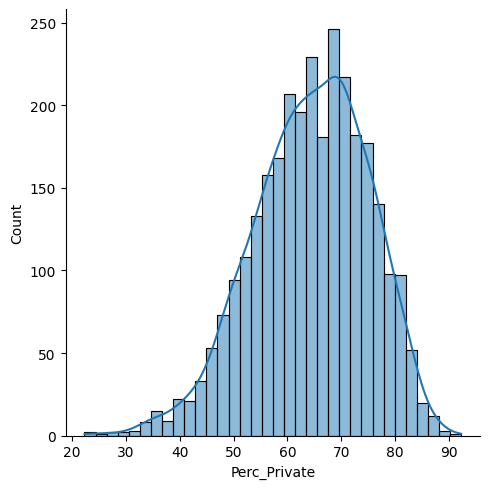

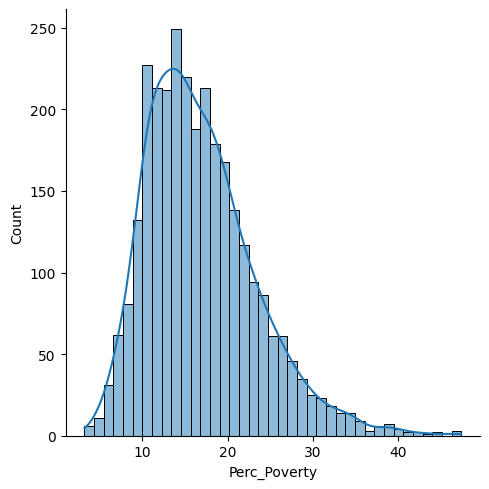

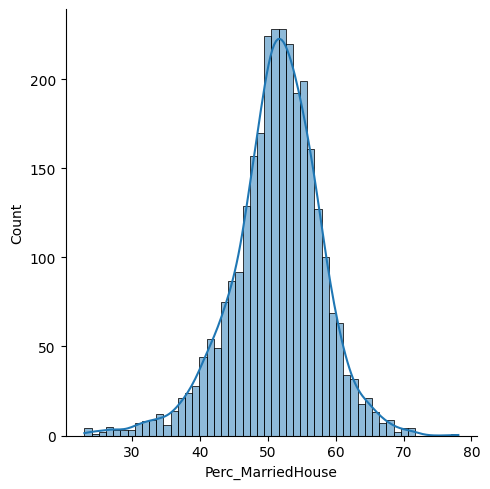

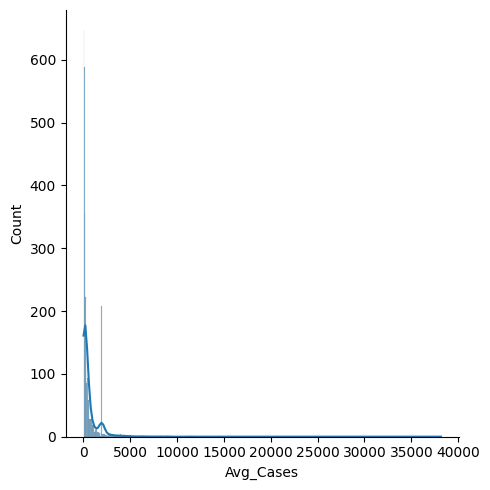

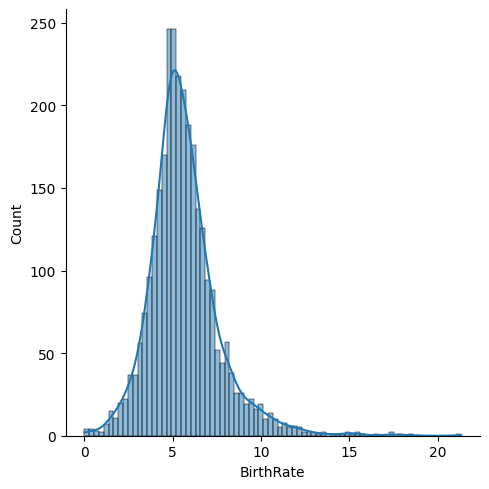

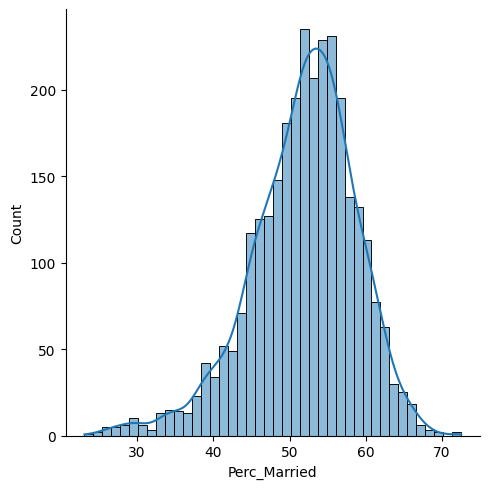

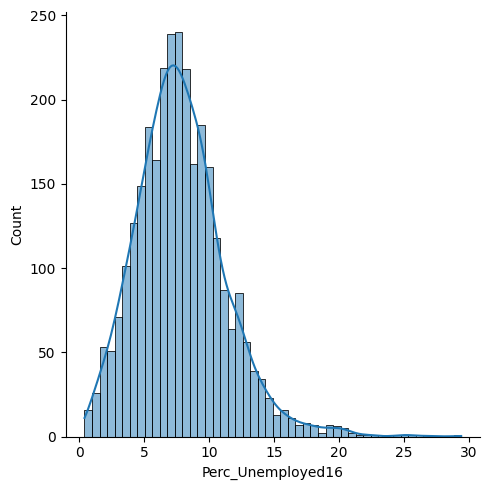

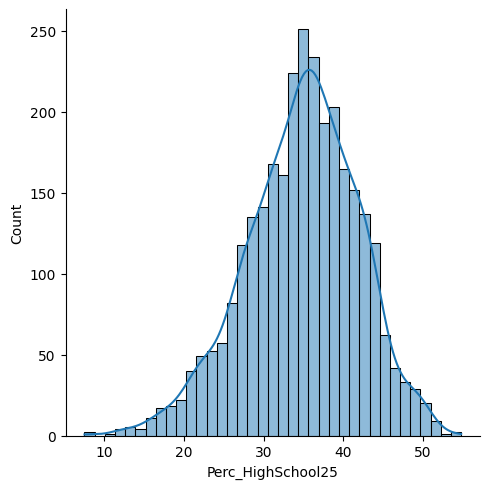

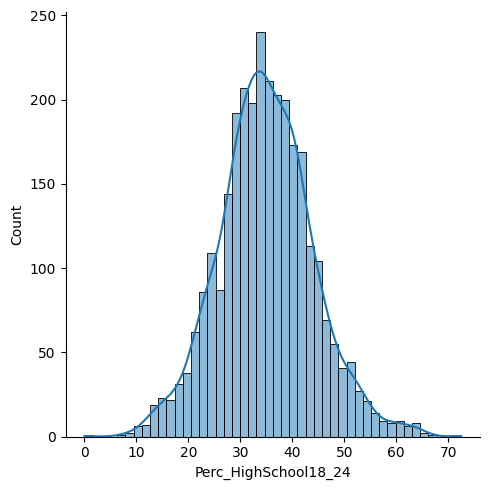

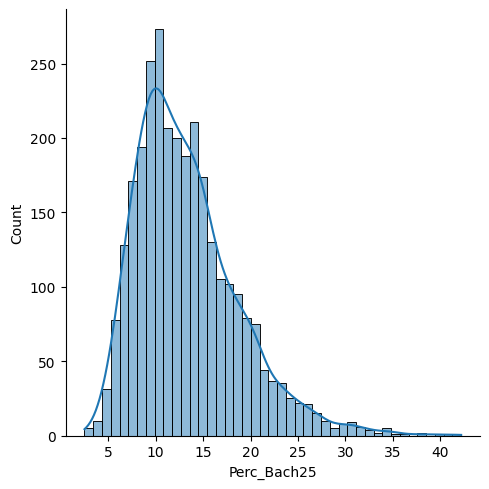

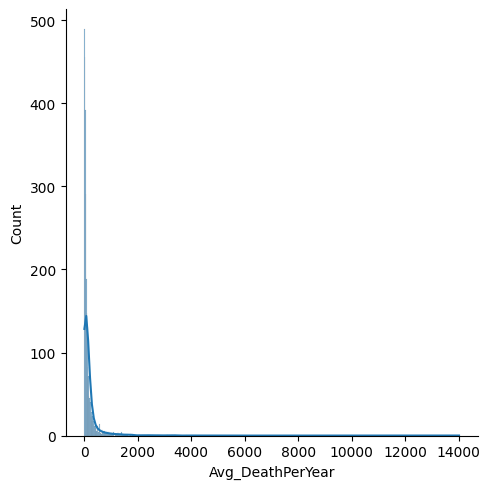

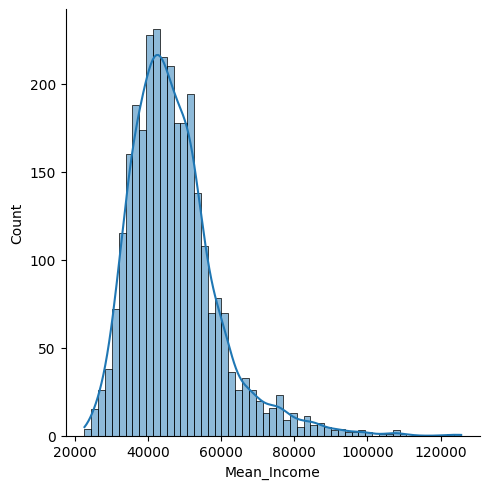

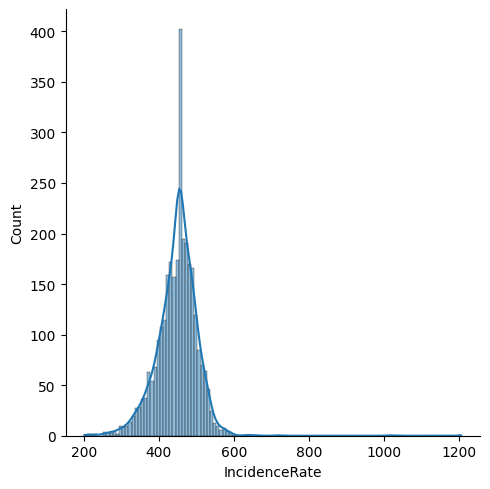

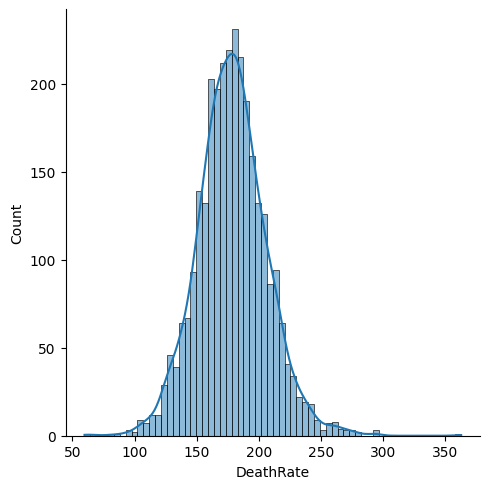

In [19]:
# Variables independientes
num_cols_x1 = x1.select_dtypes(include=np.number).columns
for col in num_cols_x1:
    sns.displot(df_[col], kde=True)
# Variable dependiente
sns.displot(y, kde=True)

- Linealidad

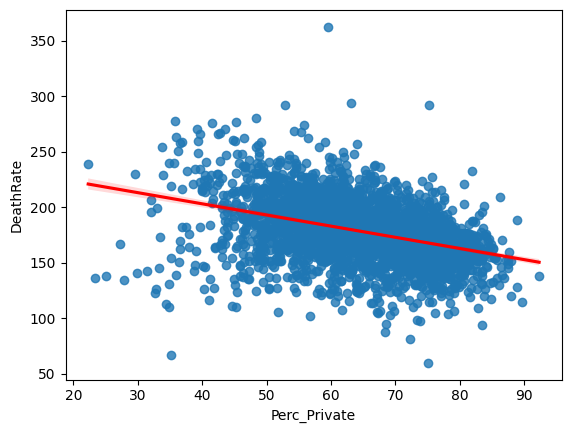

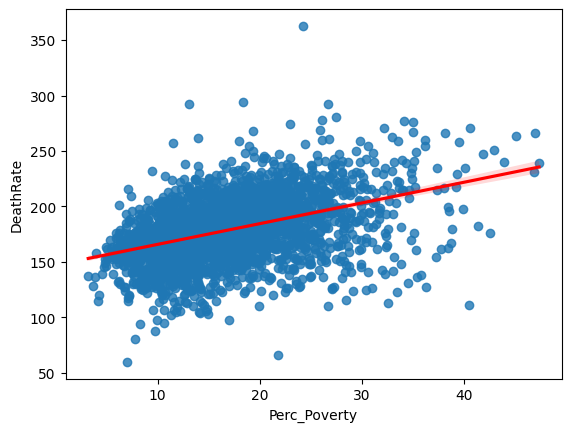

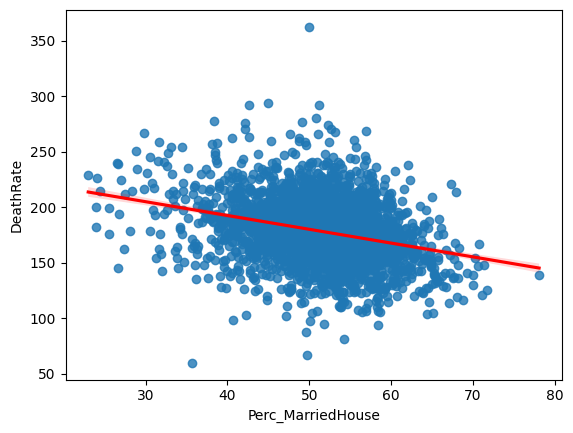

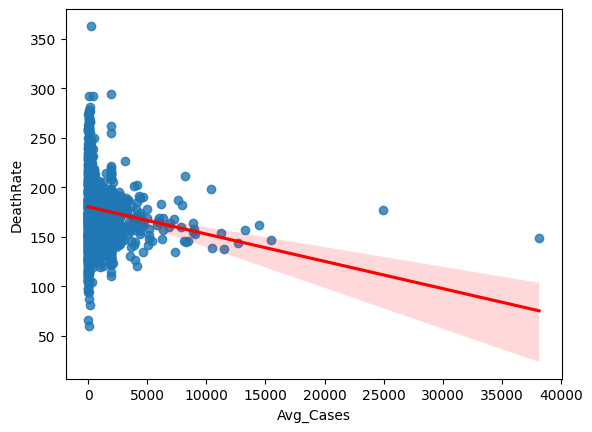

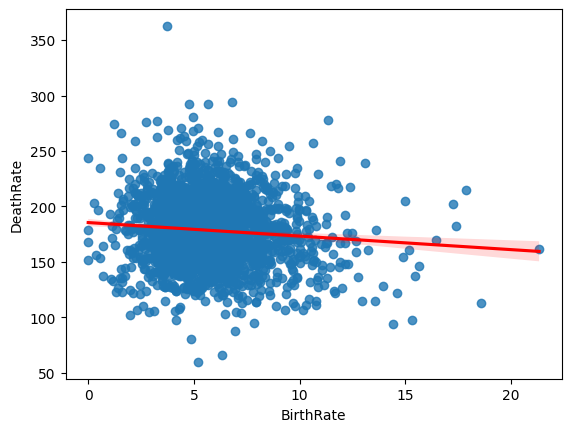

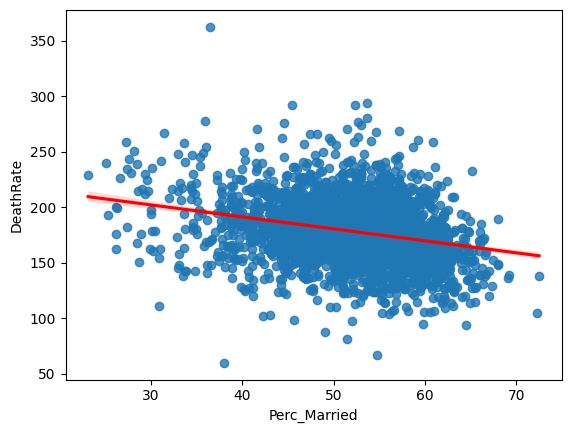

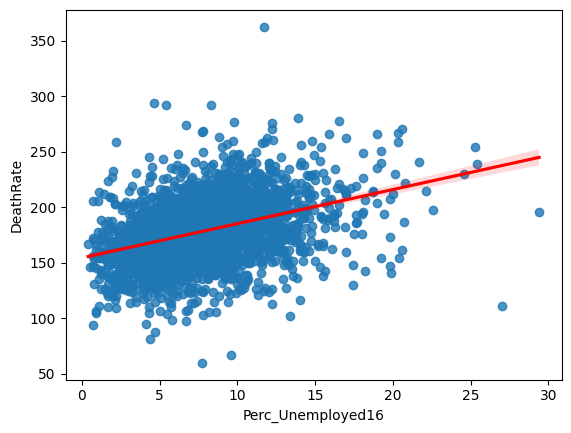

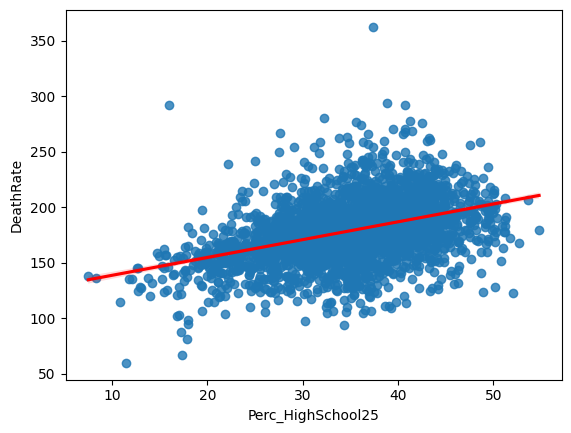

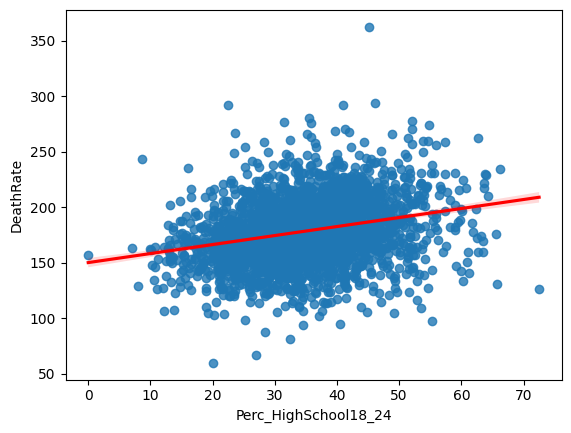

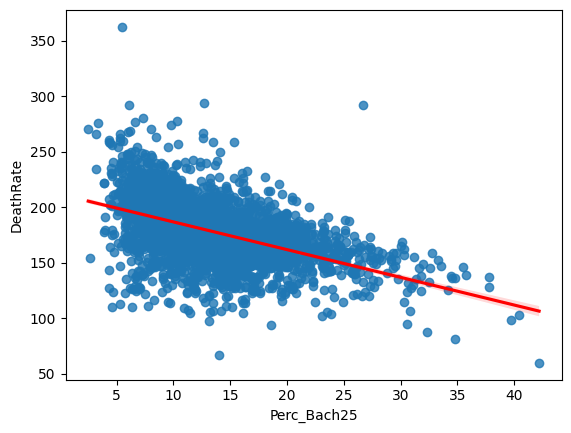

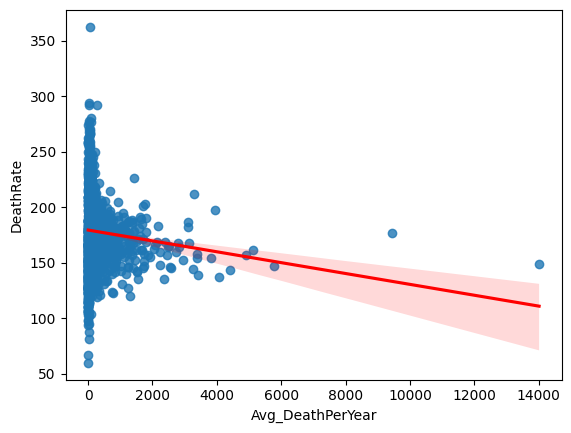

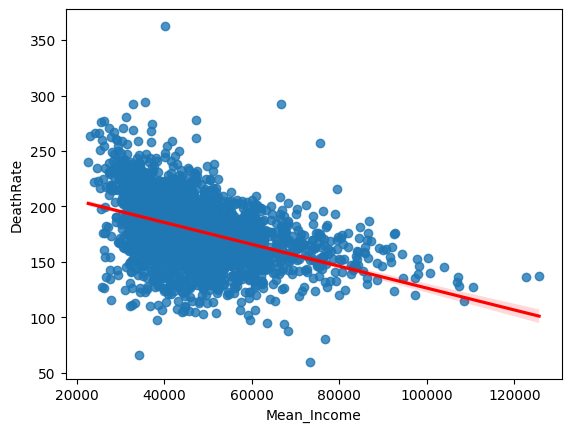

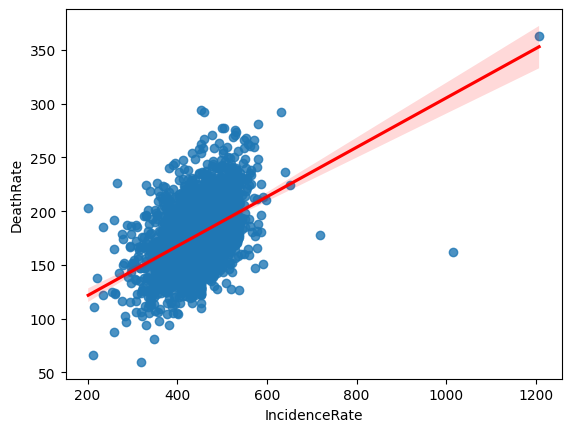

In [20]:
for col in num_cols_x1:
    sns.regplot(x=df_[col], y='DeathRate', data=df_, line_kws={'color':'red'})
    plt.show()

# 5. Modeling

5.1 Ordinary Least Squares

**- Modelo 1:**

In [21]:
'Modelo'
mod_1 = sm.OLS(y, x1.assign(const=1))
'Entrenamiento'
results_mod_1 = mod_1.fit()
'Métricas'
results_mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DeathRate   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     227.2
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:35:30   Log-Likelihood:                -13031.
No. Observations:                2963   AIC:                         2.609e+04
Df Residuals:                    2949   BIC:                         2.617e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Perc_Private            -0.1719      0.073     -2.342      0.019      -0.316      -0.028
Perc_Poverty             0.9001      0.148      6.091      0.000       0.610       1.190
Perc_MarriedHouse       -0.7410      0.127     -5.843      0.000      -0.990      -0.492
Avg_Cases               -0.0041      0.001     -5.192      0.000      -0.006      -0.003
BirthRate               -0.6917      0.189     -3.651      0.000      -1.063      -0.320
Perc_Married             0.4570      0.130      3.514      0.000       0.202       0.712
Perc_Unemployed16        0.5346      0.155      3.447      0.001       0.230       0.839
Perc_HighSchool25        0.5215      0.092      5.678      0.000       0.341       0.702
Perc_HighSchool18_24     0.2458      0.048      5.157      0.000       0.152       0.339
Perc_Bach25             -1.1235      0.147     -7.638      0.000      -1.412      -0.835
Avg_DeathPerYear         0.0095      0.002      4.312      0.000       0.005       0.014
Mean_Income              0.0002   6.84e-05      3.410      0.001    9.92e-05       0.000
IncidenceRate            0.2074      0.007     28.926      0.000       0.193       0.221
const                   73.3568     10.365      7.078      0.000      53.034      93.680
==============================================================================
Omnibus:                      178.147   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.673
Skew:                           0.084   Prob(JB):                    1.98e-162
Kurtosis:                       5.450   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**- Modelo 2:**

In [22]:
'Modelo'
mod_2 = sm.OLS(y, x2.assign(const=1))
'Entrenamiento'
results_mod_2 = mod_2.fit()
'Métricas'
results_mod_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DeathRate   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     167.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          7.27e-234
Time:                        20:35:30   Log-Likelihood:                -13504.
No. Observations:                2963   AIC:                         2.703e+04
Df Residuals:                    2954   BIC:                         2.708e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Perc_Private         -0.0122      0.065     -0.188      0.851      -0.139       0.115
Perc_MarriedHouse    -1.1643      0.145     -8.021      0.000      -1.449      -0.880
Avg_Cases            -0.0041      0.001     -4.484      0.000      -0.006      -0.002
BirthRate            -1.3729      0.219     -6.255      0.000      -1.803      -0.943
Perc_Married          0.1524      0.133      1.146      0.252      -0.108       0.413
Perc_Bach25          -2.5029      0.124    -20.119      0.000      -2.747      -2.259
Avg_DeathPerYear      0.0107      0.003      4.169      0.000       0.006       0.016
Mean_Income        9.132e-05   6.67e-05      1.369      0.171   -3.94e-05       0.000
const               268.3427      3.987     67.312      0.000     260.526     276.159
==============================================================================
Omnibus:                      183.707   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.781
Skew:                           0.070   Prob(JB):                    3.52e-174
Kurtosis:                       5.540   Cond. No.                     4.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**- Modelo 3:**

In [23]:
'Modelo'
mod_3 = sm.OLS(y, x3.assign(const=1))
'Entrenamiento'
results_mod_3 = mod_3.fit()
'Métricas'
results_mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DeathRate   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     540.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -13097.
No. Observations:                2963   AIC:                         2.621e+04
Df Residuals:                    2957   BIC:                         2.624e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Perc_Poverty             1.2779      0.079     16.253      0.000       1.124       1.432
Perc_Unemployed16        0.8928      0.146      6.124      0.000       0.607       1.179
Perc_HighSchool25        0.9568      0.060     15.851      0.000       0.838       1.075
Perc_HighSchool18_24     0.3271      0.046      7.124      0.000       0.237       0.417
IncidenceRate            0.2057      0.007     29.840      0.000       0.192       0.219
const                   12.9999      3.544      3.668      0.000       6.051      19.949
==============================================================================
Omnibus:                      173.400   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.486
Skew:                           0.087   Prob(JB):                    1.05e-153
Kurtosis:                       5.382   Cond. No.                     4.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5.2 Selección del Modelo

Se selecciona el modelo 1 debido a que presenta el mayor valor de adjusted R-squared (0.498) y el menor valor de AIC (26089.75).

- The goodness-of-fit criteria

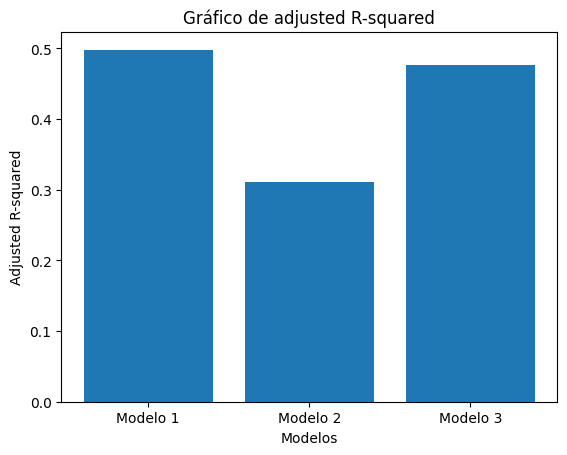

In [24]:
rsquared_adj_values = [results_mod_1.rsquared_adj, results_mod_2.rsquared_adj, results_mod_3.rsquared_adj]

plt.bar([1, 2, 3], rsquared_adj_values)
plt.xticks([1, 2, 3], ['Modelo 1', 'Modelo 2', 'Modelo 3'])
plt.xlabel('Modelos')
plt.ylabel('Adjusted R-squared')
plt.title('Gráfico de adjusted R-squared')
plt.show()

- AIC

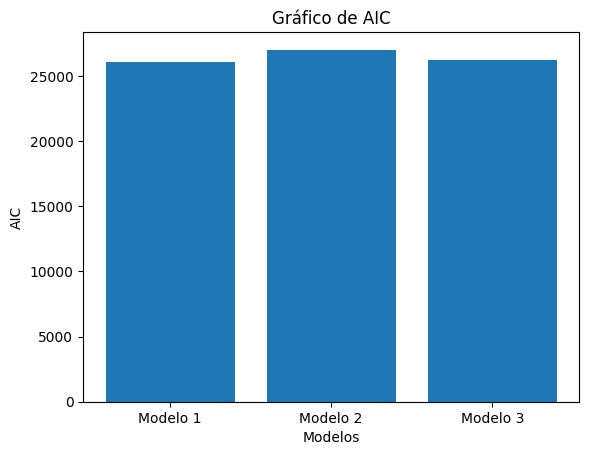

In [25]:
aic_values = [results_mod_1.aic, results_mod_2.aic, results_mod_3.aic]

plt.bar([1, 2, 3], aic_values)
plt.xticks([1, 2, 3], ['Modelo 1', 'Modelo 2', 'Modelo 3'])
plt.xlabel('Modelos')
plt.ylabel('AIC')
plt.title('Gráfico de AIC')
plt.show()

5.3 Estudio de Multicolinealidad en modelo 1

**- VIF (Variance Inflation Factor)**

In [26]:
vif_mod1 = pd.DataFrame()
vif_mod1["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif_mod1["Variables Independientes"] = x1.columns
print(vif_mod1)

           VIF Variables Independientes
0   147.124677             Perc_Private
1    22.756431             Perc_Poverty
2   327.560228        Perc_MarriedHouse
3    11.294215                Avg_Cases
4     9.664265                BirthRate
5   304.771359             Perc_Married
6    12.769424        Perc_Unemployed16
7    71.733895        Perc_HighSchool25
8    22.383760     Perc_HighSchool18_24
9    31.294380              Perc_Bach25
10   10.929677         Avg_DeathPerYear
11   75.545072              Mean_Income
12   76.701615            IncidenceRate


**- Nuevo modelo**

In [27]:
X = df_.iloc[:, [2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 16, 17, 18]]

In [28]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Variables Independientes"] = X.columns
    return vif

In [29]:
while True:
    vif = calculate_vif(X)
    max_vif = vif["VIF"].max()
    if max_vif > 10:
        remove_index = vif[vif["VIF"] == max_vif].index[0]
        X = X.drop(columns=[vif.loc[remove_index]["Variables Independientes"]])
    else:
        break

In [30]:
'Modelo'
mod_4 = sm.OLS(y, X.assign(const=1))
'Entrenamiento'
results_mod_4 = mod_4.fit()
'Métricas'
results_mod_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DeathRate   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     306.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          4.78e-221
Time:                        20:35:37   Log-Likelihood:                -13545.
No. Observations:                2963   AIC:                         2.710e+04
Df Residuals:                    2958   BIC:                         2.713e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
BirthRate            -1.4849      0.219     -6.780      0.000      -1.914      -1.055
Perc_Unemployed16     1.7535      0.139     12.656      0.000       1.482       2.025
Perc_Bach25          -2.1455      0.092    -23.369      0.000      -2.326      -1.966
Avg_DeathPerYear      0.0005      0.001      0.534      0.594      -0.001       0.002
const               201.6204      2.440     82.619      0.000     196.835     206.405
==============================================================================
Omnibus:                      176.737   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              752.901
Skew:                           0.038   Prob(JB):                    3.23e-164
Kurtosis:                       5.468   Cond. No.                     3.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print(vif)

        VIF Variables Independientes
0  5.795510                BirthRate
1  3.897987        Perc_Unemployed16
2  4.542571              Perc_Bach25
3  1.255376         Avg_DeathPerYear


5.4 Estudio de Outliers y Influential points

**- Outliers**

Para la identificación de outliers se utilizará la regla general para interpretar los residuos estandarizados: los valores atípicos serán aquellos que su "standardized residual" sea mayor a 2.

FUENTE: Stephanie Glen. "Standardized Residuals in Statistics: What are They?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/what-is-a-standardized-residuals/

In [32]:
influence = OLSInfluence(results_mod_4)
outliers = influence.summary_frame()['standard_resid'] > 2.0
print('Indices de los valores atípicos identificados:')
print(np.where(outliers))

Indices de los valores atípicos identificados:
(array([  18,   92,  107,  121,  123,  167,  210,  244,  288,  330,  339,
        374,  494,  517,  597,  602,  721,  740,  826,  830,  877,  921,
        973,  984,  994, 1042, 1060, 1086, 1100, 1120, 1196, 1222, 1302,
       1324, 1332, 1418, 1500, 1559, 1684, 1727, 1802, 1809, 1832, 1879,
       1890, 1911, 1976, 2046, 2050, 2051, 2121, 2145, 2158, 2177, 2214,
       2243, 2245, 2270, 2275, 2300, 2325, 2341, 2498, 2503, 2524, 2608,
       2667, 2675, 2726, 2770, 2808], dtype=int64),)


In [33]:
index_outliers = [18,   92,  107,  121,  123,  167,  210,  244,  288,  330,  339,
        374,  494,  517,  597,  602,  721,  740,  826,  830,  877,  921,
        973,  984,  994, 1042, 1060, 1086, 1100, 1120, 1196, 1222, 1302,
       1324, 1332, 1418, 1500, 1559, 1684, 1727, 1802, 1809, 1832, 1879,
       1890, 1911, 1976, 2046, 2050, 2051, 2121, 2145, 2158, 2177, 2214,
       2243, 2245, 2270, 2275, 2300, 2325, 2341, 2498, 2503, 2524, 2608,
       2667, 2675, 2726, 2770, 2808]

**- Influential Values**

Para la identificación de puntos influyentes se buscaran los valores de "Cook's distance" que sobrepasen **4/n**, siendo **n** = número total de datos.

In [34]:
infpoints = influence.summary_frame()['cooks_d'] > (4/len(y))
print('Indices de los valores influyentes identificados:')
print(np.where(infpoints))

Indices de los valores influyentes identificados:
(array([  70,  107,  109,  121,  123,  128,  154,  167,  183,  192,  197,
        210,  244,  245,  288,  312,  325,  339,  364,  374,  411,  428,
        469,  519,  556,  566,  573,  596,  597,  628,  643,  657,  683,
        704,  721,  740,  744,  747,  805,  817,  825,  830,  870,  877,
        914,  921,  938,  939,  949,  953,  973,  984,  994, 1040, 1042,
       1060, 1084, 1090, 1095, 1100, 1114, 1120, 1131, 1137, 1185, 1188,
       1192, 1196, 1199, 1222, 1238, 1253, 1283, 1302, 1322, 1324, 1362,
       1374, 1375, 1405, 1427, 1482, 1500, 1521, 1558, 1584, 1612, 1646,
       1656, 1667, 1671, 1684, 1727, 1730, 1754, 1801, 1802, 1824, 1853,
       1879, 1890, 1897, 1911, 1934, 1941, 1943, 1944, 1965, 1976, 2007,
       2017, 2046, 2049, 2050, 2051, 2059, 2100, 2111, 2118, 2137, 2144,
       2145, 2158, 2177, 2215, 2240, 2243, 2245, 2253, 2270, 2273, 2275,
       2296, 2310, 2316, 2325, 2341, 2384, 2399, 2411, 2412, 2418, 2438,


In [35]:
index_infpoints = [70,  107,  109,  121,  123,  128,  154,  167,  183,  192,  197,
        210,  244,  245,  288,  312,  325,  339,  364,  374,  411,  428,
        469,  519,  556,  566,  573,  596,  597,  628,  643,  657,  683,
        704,  721,  740,  744,  747,  805,  817,  825,  830,  870,  877,
        914,  921,  938,  939,  949,  953,  973,  984,  994, 1040, 1042,
       1060, 1084, 1090, 1095, 1100, 1114, 1120, 1131, 1137, 1185, 1188,
       1192, 1196, 1199, 1222, 1238, 1253, 1283, 1302, 1322, 1324, 1362,
       1374, 1375, 1405, 1427, 1482, 1500, 1521, 1558, 1584, 1612, 1646,
       1656, 1667, 1671, 1684, 1727, 1730, 1754, 1801, 1802, 1824, 1853,
       1879, 1890, 1897, 1911, 1934, 1941, 1943, 1944, 1965, 1976, 2007,
       2017, 2046, 2049, 2050, 2051, 2059, 2100, 2111, 2118, 2137, 2144,
       2145, 2158, 2177, 2215, 2240, 2243, 2245, 2253, 2270, 2273, 2275,
       2296, 2310, 2316, 2325, 2341, 2384, 2399, 2411, 2412, 2418, 2438,
       2440, 2446, 2466, 2483, 2498, 2502, 2503, 2524, 2544, 2572, 2573,
       2596, 2608, 2632, 2644, 2649, 2667, 2680, 2681, 2686, 2691, 2693,
       2698, 2726, 2736, 2737, 2756, 2770, 2789, 2826, 2834, 2838, 2842,
       2875, 2880, 2884, 2904, 2918, 2932, 2941]

**- Construcción de un nuevo modelo sin outliers y influential values**

La remoción de outliers e influential values del modelo resultó en el aumento del R-squared de 0.293 a 0.382. Por otra parte, disminuyó el AIC de 2710e+4 a 2397e+4. Con esto se puede concluir que estos valores afectaban la construcción del modelo de regresión lineal.

In [36]:
lista_resultado = list(set(index_outliers + index_infpoints))
lista_resultado.sort()
print('cant. elem index_outliers:', len(index_outliers))
print('cant. elem index_outliers:', len(index_infpoints))
print('cant. elem lista_resultado:', len(lista_resultado))
print(lista_resultado)

cant. elem index_outliers: 71
cant. elem index_outliers: 183
cant. elem lista_resultado: 201
[18, 70, 92, 107, 109, 121, 123, 128, 154, 167, 183, 192, 197, 210, 244, 245, 288, 312, 325, 330, 339, 364, 374, 411, 428, 469, 494, 517, 519, 556, 566, 573, 596, 597, 602, 628, 643, 657, 683, 704, 721, 740, 744, 747, 805, 817, 825, 826, 830, 870, 877, 914, 921, 938, 939, 949, 953, 973, 984, 994, 1040, 1042, 1060, 1084, 1086, 1090, 1095, 1100, 1114, 1120, 1131, 1137, 1185, 1188, 1192, 1196, 1199, 1222, 1238, 1253, 1283, 1302, 1322, 1324, 1332, 1362, 1374, 1375, 1405, 1418, 1427, 1482, 1500, 1521, 1558, 1559, 1584, 1612, 1646, 1656, 1667, 1671, 1684, 1727, 1730, 1754, 1801, 1802, 1809, 1824, 1832, 1853, 1879, 1890, 1897, 1911, 1934, 1941, 1943, 1944, 1965, 1976, 2007, 2017, 2046, 2049, 2050, 2051, 2059, 2100, 2111, 2118, 2121, 2137, 2144, 2145, 2158, 2177, 2214, 2215, 2240, 2243, 2245, 2253, 2270, 2273, 2275, 2296, 2300, 2310, 2316, 2325, 2341, 2384, 2399, 2411, 2412, 2418, 2438, 2440, 2446, 246

In [37]:
new_X = X.drop(lista_resultado, axis=0)
new_y = y.drop(lista_resultado, axis=0)

In [38]:
'Modelo'
mod_5 = sm.OLS(new_y, new_X.assign(const=1))
'Entrenamiento'
results_mod_5 = mod_5.fit()
'Métricas'
results_mod_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DeathRate   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     426.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.32e-286
Time:                        20:35:58   Log-Likelihood:                -11980.
No. Observations:                2762   AIC:                         2.397e+04
Df Residuals:                    2757   BIC:                         2.400e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
BirthRate            -1.6111      0.200     -8.036      0.000      -2.004      -1.218
Perc_Unemployed16     1.8982      0.127     14.993      0.000       1.650       2.146
Perc_Bach25          -2.1156      0.081    -26.047      0.000      -2.275      -1.956
Avg_DeathPerYear      0.0024      0.001      2.197      0.028       0.000       0.005
const               200.5494      2.233     89.819      0.000     196.171     204.928
==============================================================================
Omnibus:                       17.373   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.526
Skew:                          -0.186   Prob(JB):                     0.000156
Kurtosis:                       2.884   Cond. No.                     2.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5.5 Regression Model Assumptions

Para analizar las suposiciones del modelo se realizó un estudio de residuales para el modelo con outliers e influential points, y el sin estos valores. Se realizaron 3 tipos de gráficos para observar con detalle la distribución de los residuales: Gráfico de residuos por predicción, Histograma de residuos y Gráfica de probabilidad normal de los residuos. Para el caso del Histograma de residuos, se realiza además un test de normalidad: test de Shapiro-Wilks, ​el cual se considera uno de las pruebas más potentes para el contraste de normalidad.

En base a los resultados se concluye que la remoción de outliers e influential points tiene un efecto significativo en la distribución de los residuales. Si se observa los resultados del test de Shapiro-Wilks, vemos que ningún modelo los residuos siguen una distribución normal (alfa=0.05). Sin embargo, el modelo sin outliers e influencial points (4.5399265218293294e-06) se acerca considerablemente a la distribución normal en relación al otro modelo (p-value: 7.22062597245017e-21).

**- Modelo con outliers y influential points:**

- Gráfico de valores residuales versus los predecidos

In [39]:
residuals_mod_4 = results_mod_4.resid
prediction_mod_4 = results_mod_4.predict()

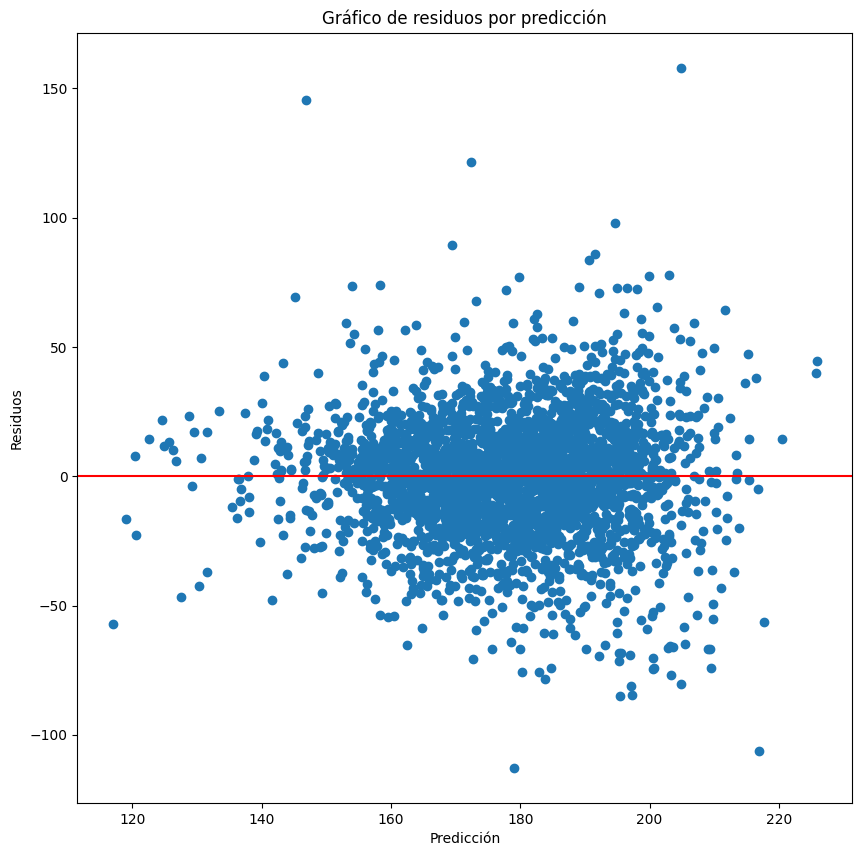

In [40]:
plt.subplots(figsize=(10,10))
plt.scatter(prediction_mod_4, residuals_mod_4)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Gráfico de residuos por predicción")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.show()

- Histograma de residuos

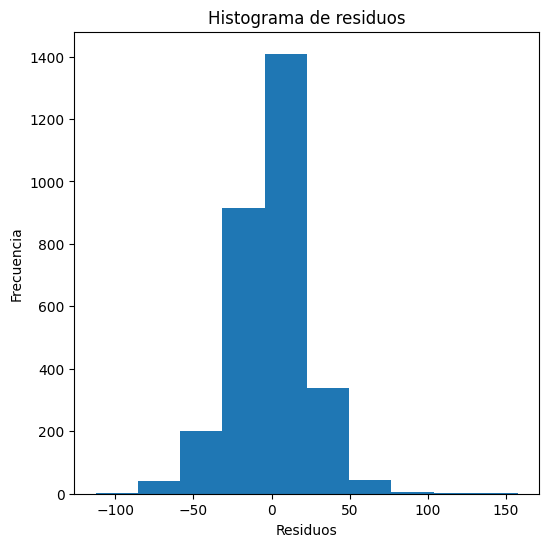

In [41]:
plt.subplots(figsize=(6,6))
plt.hist(residuals_mod_4, bins=10)
plt.title("Histograma de residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

Se realiza la prueba de normalidad de Shapiro-Wilk:

In [42]:
stat, p = shapiro(residuals_mod_4)
alpha = 0.05
if p > alpha:
    print('Los residuos siguen una distribución normal (p-value = %.5f)' % p)
    print('p-value:', p)
else:
    print('Los residuos NO siguen una distribución normal (p-value = %.5f)' % p)
    print('p-value:', p)

Los residuos NO siguen una distribución normal (p-value = 0.00000)
p-value: 7.22062597245017e-21


- Gráfica de probabilidad normal de los residuos

c:\Users\carolina\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


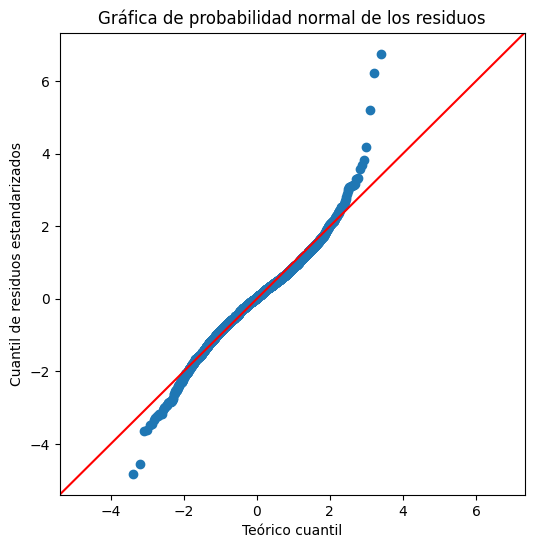

In [43]:
fig, ax = plt.subplots(figsize=(6,6))
qq = ProbPlot(residuals_mod_4, fit=True)
qq.qqplot(line='45', ax=ax, color='b')
ax.set_title("Gráfica de probabilidad normal de los residuos")
ax.set_xlabel("Teórico cuantil")
ax.set_ylabel("Cuantil de residuos estandarizados")
plt.show()

**- Modelo sin outliers y influential points:**

- Gráfico de valores residuales versus los predecidos

In [44]:
residuals_mod_5 = results_mod_5.resid
prediction_mod_5 = results_mod_5.predict()

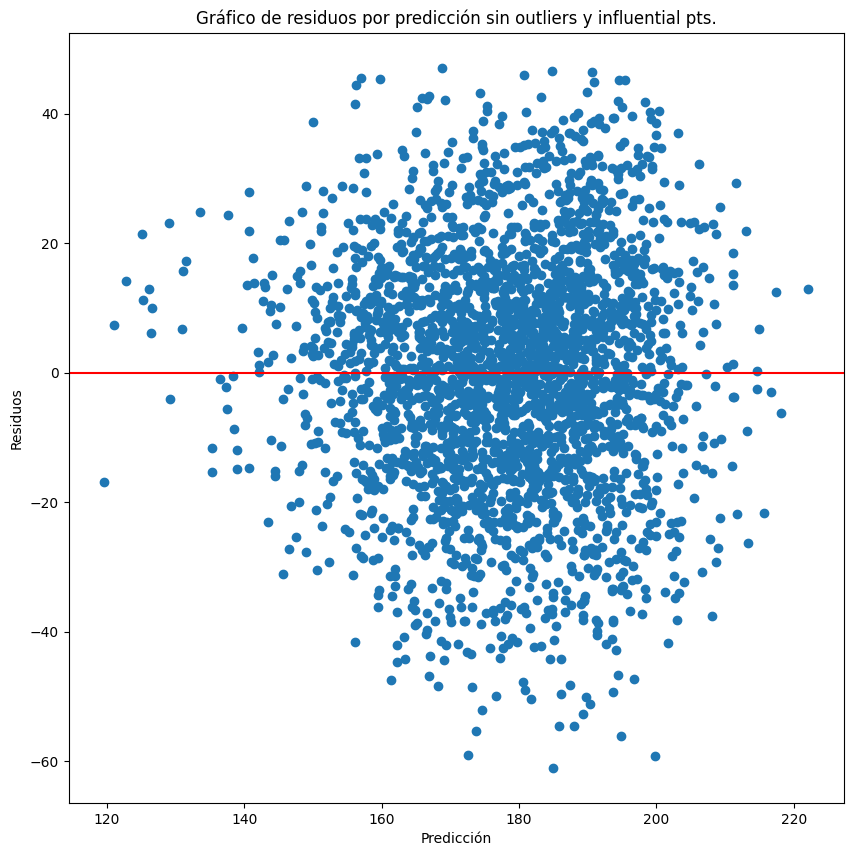

In [45]:
plt.subplots(figsize=(10,10))
plt.scatter(prediction_mod_5, residuals_mod_5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Gráfico de residuos por predicción sin outliers y influential pts.")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.show()

- Histograma de residuos

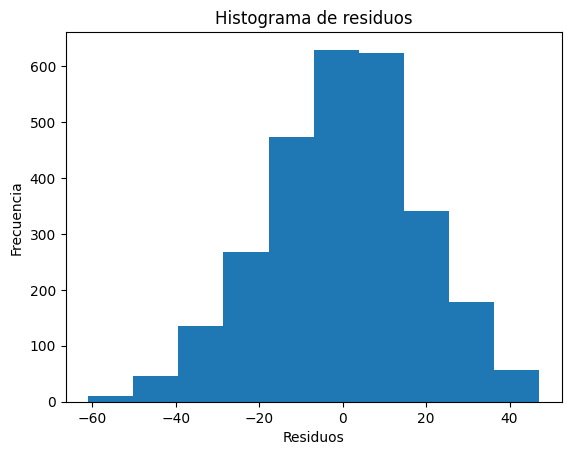

In [46]:
plt.hist(residuals_mod_5, bins=10)
plt.title("Histograma de residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

Se realiza la prueba de normalidad de Shapiro-Wilk:

In [47]:
stat, p = shapiro(residuals_mod_5)
alpha = 0.05
if p > alpha:
    print('Los residuos siguen una distribución normal (p-value = %.5f)' % p)
    print('p-value:', p)
else:
    print('Los residuos NO siguen una distribución normal (p-value = %.5f)' % p)
    print('p-value:', p)

Los residuos NO siguen una distribución normal (p-value = 0.00000)
p-value: 4.5399265218293294e-06


- Gráfica de probabilidad normal de los residuos

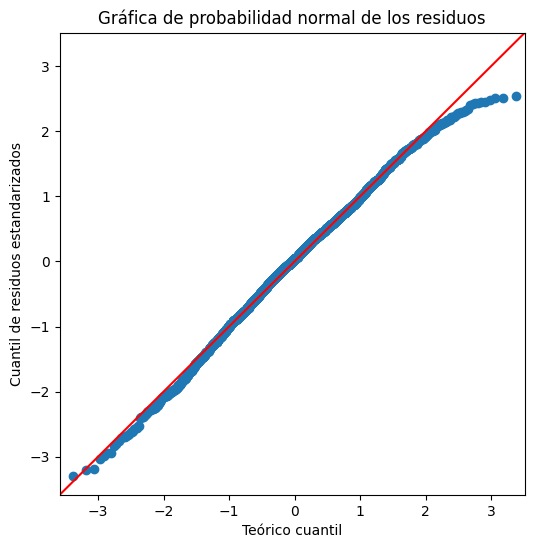

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
qq = ProbPlot(residuals_mod_5, fit=True)
qq.qqplot(line='45', ax=ax, color='b')
ax.set_title("Gráfica de probabilidad normal de los residuos")
ax.set_xlabel("Teórico cuantil")
ax.set_ylabel("Cuantil de residuos estandarizados")
plt.show()